# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
#libraries
import numpy as np
import pandas as pd

# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [2]:
# columm of (type) - passangers/crews
df_titanic["type"] = df_titanic["class"].map({
    "1st": "1st passenger",
    "2nd": "2nd passenger",
    "3rd": "3rd passenger",
})
df_titanic

#filter by type
df_titanic_cleaned = df_titanic.dropna()
df_titanic_cleaned



#joint distribution (cross-tab)
pd.crosstab(df_titanic_cleaned["type"], df_titanic_cleaned["embarked"])


embarked,C,Q,S
type,,,
1st passenger,131,3,167
2nd passenger,25,7,231
3rd passenger,88,112,449


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [3]:
# Conditional distribution of class / embarked
pd.crosstab(df_titanic_cleaned["type"], df_titanic_cleaned["embarked"], normalize="columns")

#What proportion of 3rd class passengers embarked at Southampton? - 0.530106


embarked,C,Q,S
type,,,
1st passenger,0.536885,0.024590,0.197166
2nd passenger,0.102459,0.057377,0.272727
3rd passenger,0.360656,0.918033,0.530106


In [4]:
pd.crosstab(df_titanic_cleaned["type"], df_titanic_cleaned["embarked"], normalize="columns")
pd.crosstab(df_titanic_cleaned["embarked"], df_titanic_cleaned["type"], normalize="columns")

type,1st passenger,2nd passenger,3rd passenger
embarked,,,
C,0.435216,0.095057,0.135593
Q,0.009967,0.026616,0.172573
S,0.554817,0.878327,0.691834


In [5]:
# Conditional distribution of embarked / class
pd.crosstab(df_titanic_cleaned["type"], df_titanic_cleaned["embarked"], normalize="index")

# What proportion of Southampton passengers were in 3rd class? - 0.691834

embarked,C,Q,S
type,,,
1st passenger,0.435216,0.009967,0.554817
2nd passenger,0.095057,0.026616,0.878327
3rd passenger,0.135593,0.172573,0.691834


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

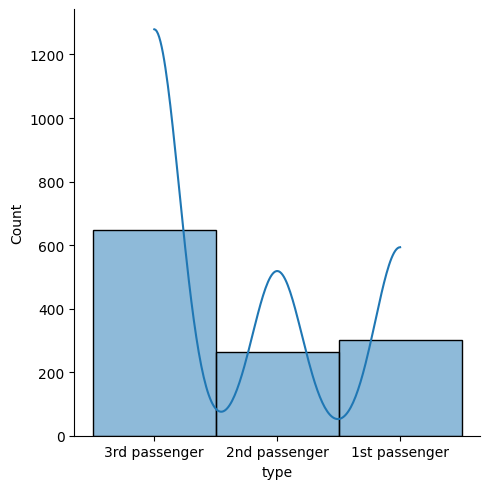

In [6]:
#Viz code
#pro - viz is earlier and faster to understand for more divserve groups
#con - it takes time & specifities to make

# library & dataset
import seaborn as sns

# Plot the histogram thanks to the displot function
sns.displot(df_titanic_cleaned["type"], kde=True )
